### Test signal welch function with real vs. complex inputs


In [18]:
import os
import numpy as np
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
from loading_functions import *
from scipy import signal

In [20]:
# DroneDetect
main_folder = '/home/ltindall/data/DroneDetect/DroneDetect_V2/' # data path on mp-gpu-desktop06
sub_folders = os.listdir(main_folder)
fs = 60e6 #60 MHz

In [6]:
# loop through all files
for sf in ['WIFI']: #, 'BLUE', 'BOTH', 'CLEAN']: # options: ['WIFI', 'BLUE', 'BOTH', 'CLEAN']
    print('current folder: ', sf)

    drone_folders = os.listdir(main_folder+sf+'/')
    for df in drone_folders:
#         print('     subfolder:', df)
        # reset lists -  to save memory
        DRONES = []
        CONDS =[]
        INTS = [] # interferences: 00 for a clean signal, 01 for Bluetooth only, 10 for Wi-Fi only and 11 for Bluetooth and Wi-Fi interference concurrently.

        # features
        F_PSD = []
        F_PSD_freq = []

        F_SPEC = []
        F_SPEC_freq = []
        F_SPEC_time = []

        files = os.listdir(main_folder+sf+'/'+df+'/')
        

current folder:  WIFI


In [122]:
## Pick file to load
sf = 'CLEAN'
df = 'DIS_ON'
files = os.listdir(main_folder+sf+'/'+df+'/')

In [123]:
files

['DIS_0000_00.dat',
 'DIS_0000_04.dat',
 'DIS_0000_03.dat',
 'DIS_0000_01.dat',
 'DIS_0000_02.dat']

In [124]:
fi = files[0]

In [125]:
t_seg = 20
d_split, _ = load_dronedetect_raw(main_folder+sf+'/'+df+'/'+fi, t_seg)
print(len(d_split))

100


In [138]:
Psds = []
for i_plot in range(100):
    fpsd, Pxx_den = signal.welch(d_split[i_plot], fs, window='hann', nperseg=1024, noverlap=120)
#     Pxx_den, fpsd = plt.psd(d_split[i_plot],Fs=fs)
    Psds.append(Pxx_den)

In [139]:
mean_psd = np.mean(np.array(Psds), axis=0)

Text(0.5, 1.0, 'Using Complex Inputs')

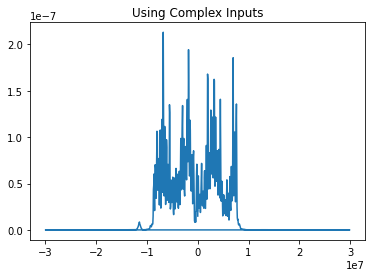

In [140]:
plt.plot(fpsd, mean_psd)
plt.title('Using Complex Inputs')

In [120]:
np.divide(mean_psd,fpsd)

/tmp/ipykernel_87023/660875403.py:1: RuntimeWarning: divide by zero encountered in divide
  np.divide(mean_psd,fpsd)


array([            inf,  1.09256528e-14,  5.54266914e-15, ...,
       -3.56765939e-15, -5.23715045e-15, -1.07979702e-14])

In [90]:
d_real = abs(d_split[i_plot])
fpsd, Pxx_den_real = signal.welch(d_real, fs, window='hann', nperseg=4*4*1024)

Text(0.5, 1.0, 'Using Magnitude Inputs')

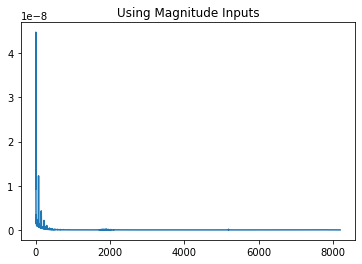

In [91]:
plt.plot(Pxx_den_real)
plt.title('Using Magnitude Inputs')

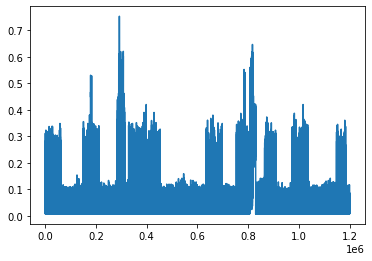

In [92]:
plt.plot(d_real)

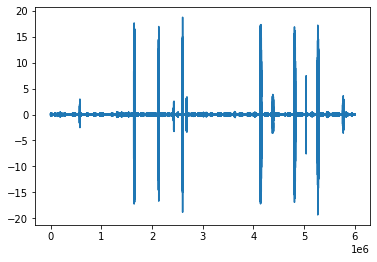

In [53]:
plt.plot(d_split[i_plot])

In [58]:
## Using matplotlib

In [59]:
import matplotlib.pyplot as plt

(array([6.98013750e-12, 6.98664382e-12, 6.90551437e-12, 6.93256859e-12,
        6.94713497e-12, 7.10593636e-12, 7.04214386e-12, 7.00137196e-12,
        7.16423064e-12, 7.15201597e-12, 7.19031487e-12, 7.29215306e-12,
        7.41850991e-12, 7.32835387e-12, 7.43779544e-12, 7.84285820e-12,
        8.12962749e-12, 8.24541468e-12, 8.39362543e-12, 7.90852332e-12,
        7.47044596e-12, 7.24129909e-12, 7.22215957e-12, 7.22612911e-12,
        7.17800307e-12, 7.19654717e-12, 7.38088024e-12, 7.69437388e-12,
        7.65161946e-12, 7.80099098e-12, 8.30101763e-12, 9.10864826e-12,
        1.04434123e-11, 1.24090340e-11, 1.54278443e-11, 2.00176926e-11,
        2.60829796e-11, 3.61734788e-11, 5.19397876e-11, 7.72765766e-11,
        2.10943936e-10, 5.52168202e-10, 9.38249327e-10, 1.42624735e-09,
        1.87656092e-09, 1.59679175e-09, 1.06498880e-09, 1.44740893e-09,
        2.11894595e-09, 3.04467763e-09, 4.36404685e-09, 3.83472690e-09,
        6.95067882e-10, 4.24223803e-11, 3.73688943e-11, 4.000598

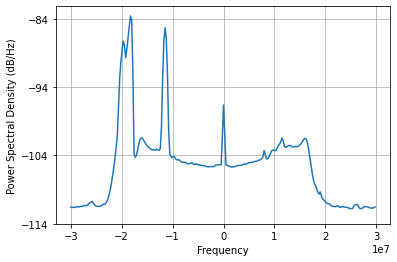

In [98]:
plt.psd(d_split[i_plot],Fs=fs)

(array([2.81781476e-06, 1.64528258e-06, 2.09284201e-07, 1.41004859e-07,
        7.73394033e-08, 1.60365737e-08, 3.35319238e-09, 1.91977878e-09,
        1.04005707e-09, 6.01857694e-10, 4.44491141e-10, 3.68967741e-10,
        2.35438249e-10, 1.95328905e-10, 1.65332972e-10, 1.72866854e-10,
        1.99908804e-10, 2.17126806e-10, 1.73353293e-10, 1.13533673e-10,
        1.32622281e-10, 1.67939393e-10, 1.49566903e-10, 9.29822284e-11,
        8.72611416e-11, 9.06527234e-11, 8.22174384e-11, 7.81043077e-11,
        8.91364314e-11, 7.93461054e-11, 8.04991162e-11, 8.53041786e-11,
        9.94053435e-11, 9.59050604e-11, 8.19262605e-11, 8.55646033e-11,
        1.15669467e-10, 9.65120621e-11, 6.97408164e-11, 6.08200003e-11,
        7.28476634e-11, 7.41841271e-11, 1.23402808e-10, 1.62230795e-10,
        9.57006979e-11, 8.02617858e-11, 7.59167939e-11, 8.48357188e-11,
        9.36091849e-11, 9.32547681e-11, 8.44975582e-11, 9.79519333e-11,
        1.41129707e-10, 1.44816407e-10, 1.18325743e-10, 8.492692

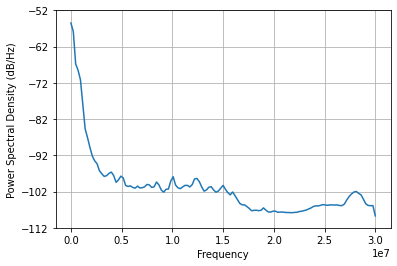

In [62]:
plt.psd(d_real,Fs=fs)

In [93]:
fspec, t, Sxx = signal.spectrogram(d_split[i_plot], fs, window='hamming', nperseg=1024, noverlap =0)

In [94]:
d_split[0].real

array([ 0.97015065,  1.2849653 ,  1.5139215 , ...,  0.02570649,
       -0.04584231,  0.02570649], dtype=float32)

/tmp/ipykernel_87023/2006008834.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(t, fspec, Sxx)


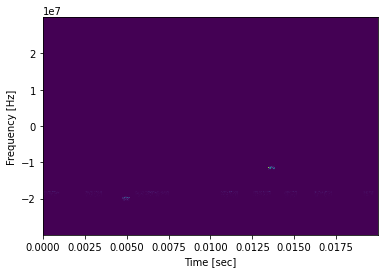

In [95]:
plt.pcolormesh(t, fspec, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()